In [5]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [6]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')


/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2077/2615162.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


15:58:44 - cmdstanpy - INFO - Chain [1] start processing
15:58:44 - cmdstanpy - INFO - Chain [1] done processing
15:58:44 - cmdstanpy - INFO - Chain [1] start processing
15:58:44 - cmdstanpy - INFO - Chain [1] done processing


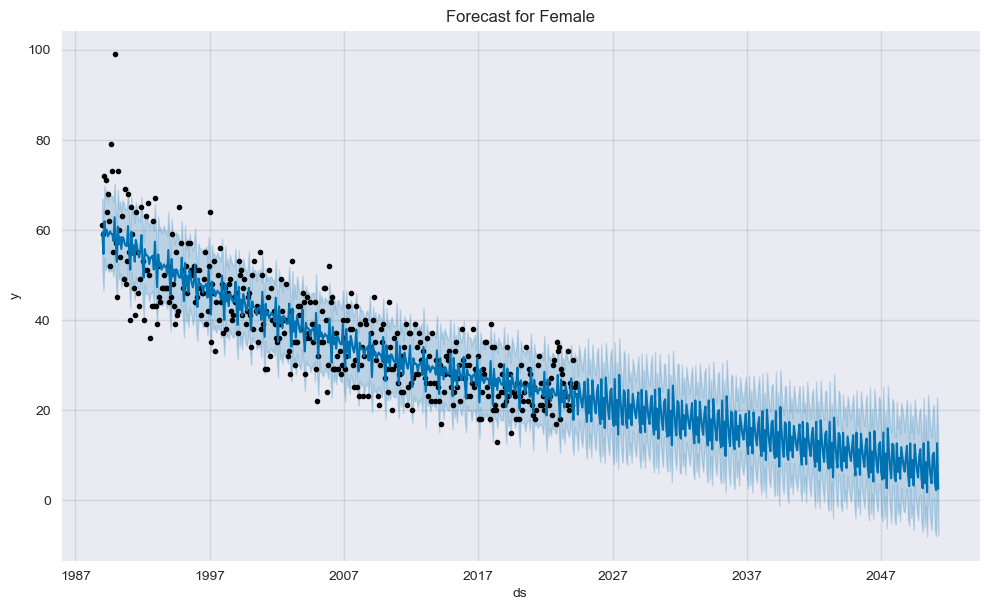

There are no forecasted dates when fatalities might reach zero for Female within the prediction range.

Predictions for Female for the first three months of 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  21.009835   12.956982   29.484453
421 2024-02-01  17.804730   10.058859   25.800635
422 2024-03-01  24.216171   16.198850   32.694479


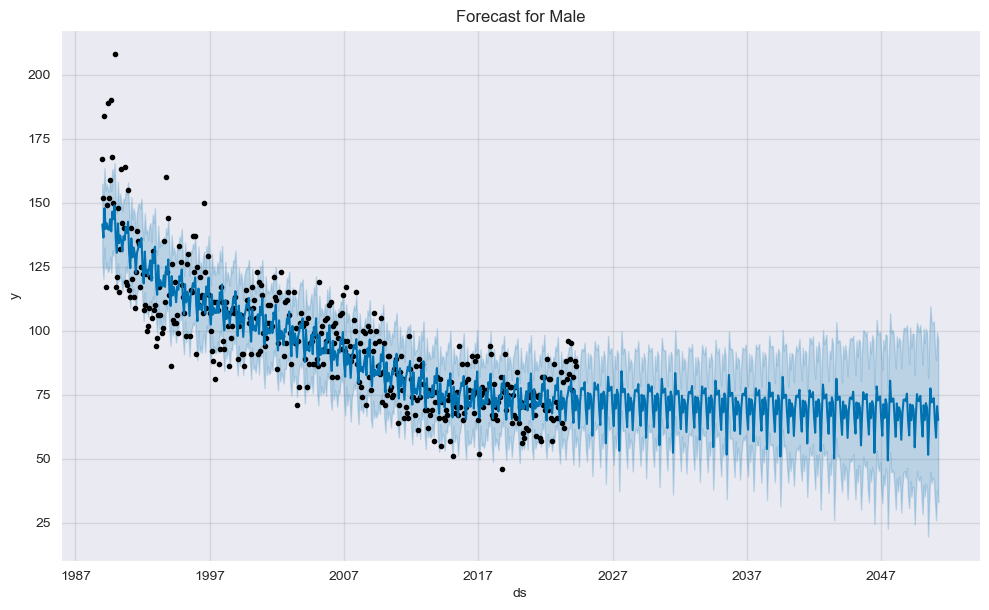

There are no forecasted dates when fatalities might reach zero for Male within the prediction range.

Predictions for Male for the first three months of 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  69.666488   53.383695   85.616683
421 2024-02-01  63.983374   47.549158   80.013234
422 2024-03-01  76.835681   61.645246   92.427301


In [13]:


df = data[['Year', 'Month', 'Gender']]
df = df[df['Gender'].isin(['Female', 'Male'])]

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

monthly_fatalities = df.groupby(['Date', 'Gender']).size().reset_index(name='Fatalities')

models = {}
forecasts = {}
valid_genders = ['Female', 'Male']

for gender in valid_genders:
    df_gender = monthly_fatalities[monthly_fatalities['Gender'] == gender][['Date', 'Fatalities']].rename(columns={'Date': 'ds', 'Fatalities': 'y'})
    
    
    model = Prophet(interval_width=0.8,
             yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False,changepoint_prior_scale=0.05,seasonality_prior_scale=10.0




)
    model.fit(df_gender)
    
    future = model.make_future_dataframe(periods=324, freq='M')  # Extend the dataframe to 2050 (324 months from 2024)
    
    forecast = model.predict(future)
    
     
    models[gender] = model
    forecasts[gender] = forecast

for gender in valid_genders:
    forecast = forecasts[gender]
    model = models[gender]
    
    model.plot(forecast)
    plt.title(f'Forecast for {gender}')
    plt.show()
    
    threshold = 1  # You can adjust this threshold as needed
    zero_fatality_date = forecast[forecast['yhat'] < threshold].head(1)['ds']
    if not zero_fatality_date.empty:
        print(f'The forecasted date when fatalities might reach zero for {gender} is: {zero_fatality_date.iloc[0]}')
    else:
        print(f'There are no forecasted dates when fatalities might reach zero for {gender} within the prediction range.')

    start_date = '2024-01-01'
    end_date = '2024-03-31'
    predictions_2024_q1 = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
    print(f'\nPredictions for {gender} for the first three months of 2024:')
    print(predictions_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])



In [47]:
# Filter the real data for the first three months of 2024
start_date_real = '2024-01-01'
end_date_real = '2024-03-31'

# Group by Date and Gender, and count the occurrences for the period 2024 Q1
real_fatalities_2024_q1 = monthly_fatalities[(monthly_fatalities['Date'] >= start_date_real) & (monthly_fatalities['Date'] <= end_date_real)]

print('Real fatalities for the first three months of 2024:')
print(real_fatalities_2024_q1)


Real fatalities for the first three months of 2024:
          Date  Gender  Fatalities
840 2024-01-01  Female          21
841 2024-01-01    Male          77
842 2024-02-01  Female          31
843 2024-02-01    Male          82
844 2024-03-01  Female          25
845 2024-03-01    Male          88


15:59:02 - cmdstanpy - INFO - Chain [1] start processing
15:59:02 - cmdstanpy - INFO - Chain [1] done processing
15:59:02 - cmdstanpy - INFO - Chain [1] start processing
15:59:02 - cmdstanpy - INFO - Chain [1] done processing


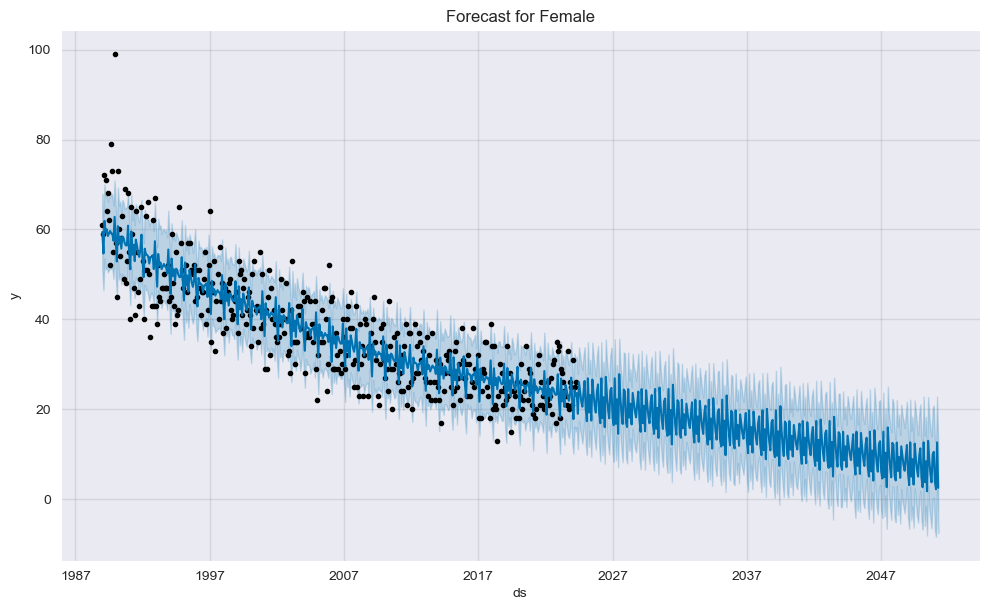

There are no forecasted dates when fatalities might reach zero for Female within the prediction range.

Predictions for Female for the first three months of 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  21.009835   12.380496   29.468070
421 2024-02-01  17.804730   10.102534   25.693487
422 2024-03-01  24.216171   16.164426   32.399780


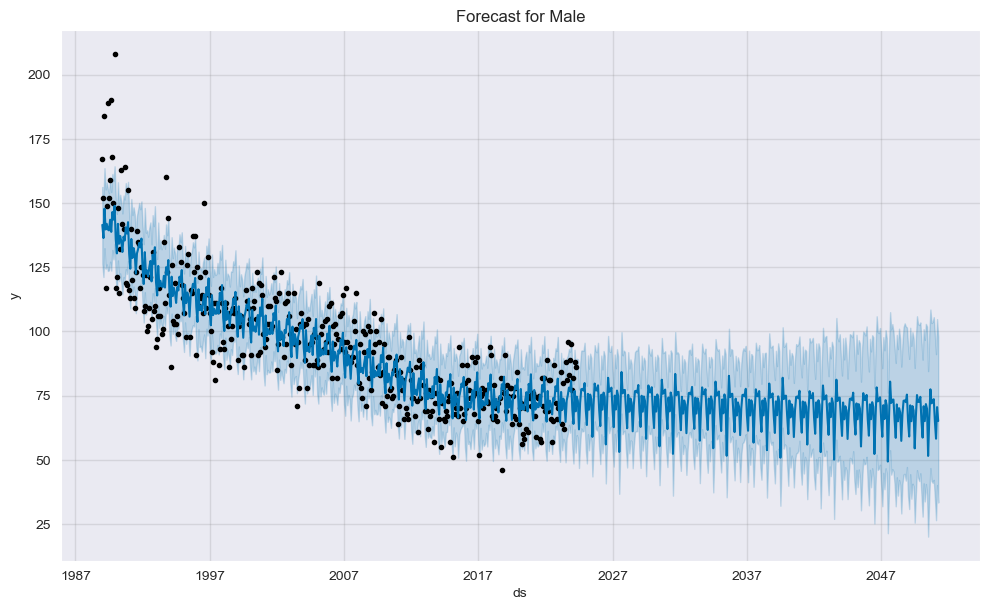

There are no forecasted dates when fatalities might reach zero for Male within the prediction range.

Predictions for Male for the first three months of 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  69.666488   54.266948   85.623500
421 2024-02-01  63.983374   48.543275   79.533939
422 2024-03-01  76.835681   61.814549   92.867748


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


df = data[['Year', 'Month', 'Gender']]
df = df[df['Gender'].isin(['Female', 'Male'])]

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

monthly_fatalities = df.groupby(['Date', 'Gender']).size().reset_index(name='Fatalities')

models = {}
forecasts = {}
valid_genders = ['Female', 'Male']

for gender in valid_genders:
    df_gender = monthly_fatalities[monthly_fatalities['Gender'] == gender][['Date', 'Fatalities']].rename(columns={'Date': 'ds', 'Fatalities': 'y'})
    
    model = Prophet(interval_width=0.8,
                    yearly_seasonality=True,
                    weekly_seasonality=False,
                    daily_seasonality=False,
                    changepoint_prior_scale=0.05,
                    seasonality_prior_scale=10.0)
    model.fit(df_gender)
    
    future = model.make_future_dataframe(periods=324, freq='M')  # Extend the dataframe to 2050 (324 months from 2024)
    
    forecast = model.predict(future)
    
    models[gender] = model
    forecasts[gender] = forecast

for gender in valid_genders:
    forecast = forecasts[gender]
    model = models[gender]
    
    model.plot(forecast)
    plt.title(f'Forecast for {gender}')
    plt.show()
    
    threshold = 1  # You can adjust this threshold as needed
    zero_fatality_date = forecast[forecast['yhat'] < threshold].head(1)['ds']
    if not zero_fatality_date.empty:
        print(f'The forecasted date when fatalities might reach zero for {gender} is: {zero_fatality_date.iloc[0]}')
    else:
        print(f'There are no forecasted dates when fatalities might reach zero for {gender} within the prediction range.')

    start_date = '2024-01-01'
    end_date = '2024-03-31'
    predictions_2024_q1 = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
    print(f'\nPredictions for {gender} for the first three months of 2024:')
    print(predictions_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


In [48]:
# Filter the real data for the first three months of 2024
start_date_real = '2024-01-01'
end_date_real = '2024-03-31'

# Group by Date and Gender, and count the occurrences for the period 2024 Q1
real_fatalities_2024_q1 = monthly_fatalities[(monthly_fatalities['Date'] >= start_date_real) & (monthly_fatalities['Date'] <= end_date_real)]

print('Real fatalities for the first three months of 2024:')
print(real_fatalities_2024_q1)


Real fatalities for the first three months of 2024:
          Date  Gender  Fatalities
840 2024-01-01  Female          21
841 2024-01-01    Male          77
842 2024-02-01  Female          31
843 2024-02-01    Male          82
844 2024-03-01  Female          25
845 2024-03-01    Male          88
